# Greensol Credit Scoring Assessment

Welcome! This 3-day assessment is designed to evaluate your data analysis, feature engineering, and basic modeling skills using a mock financial transactions dataset.

You are expected to:
- Clean and preprocess the dataset
- Perform exploratory data analysis (EDA)
- Engineer features relevant to credit scoring
- Calculate a basic monthly credit score for users
- (Optional) Propose improvements or insights

---

## Day 1: Data Cleaning and Exploration

1. Load the dataset and inspect the first few rows.
2. Check for missing values and inconsistent data.
3. Parse and convert dates correctly.
4. Identify user behaviors (e.g., number of transactions per month).


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("greensol_mock_transactions.csv", parse_dates=['transaction_date', 'due_date'])

# Display first few rows
df.head()

,user_id,transaction_id,amount,transaction_date,due_date,category,balance,credit_limit
0,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,6b70ecb7-5c0b-4b8c-8693-80e59d708770,2873.95,2024-10-16,2024-10-16,petrol,93440.05,150000
1,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,c6b4d6c1-5412-4606-b701-fec6cc877909,7388.38,2024-10-19,2024-10-19,solar,88925.62,150000
2,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,8cc164b3-c51c-4671-a40e-aec2cd93bf49,7645.70,2024-10-09,2024-10-09,petrol,88668.30,150000
3,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,7bd59bc2-ad16-41df-a417-f3040cdc2f0b,1184.58,2024-10-06,2024-10-04,petrol,95129.42,150000
4,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,9a9ada38-58cf-43be-82d2-27449a7dc9a4,6699.36,2024-10-30,2024-10-30,petrol,96314.00,150000


> The first 5 rows of the dataframe looks okay for now, containing no missing data.

In [2]:
df.shape # Provides the number of rows and columns in the DataFrame

(6007, 8)

> The dataframe contains 6007 rows and 8 features.

In [3]:
df.describe() # Get summary statistics

,amount,transaction_date,due_date,balance,credit_limit
count,6007.000000,6007,6007,6007.000000,6007.000000
mean,5189.388463,2024-12-30 10:51:04.824371968,2024-12-30 03:34:32.981521664,64603.873185,132087.564508
min,502.120000,2024-10-01 00:00:00,2024-09-26 00:00:00,253.060000,50000.000000
25%,2841.965000,2024-11-15 00:00:00,2024-11-14 12:00:00,26817.380000,100000.000000
50%,5154.500000,2025-01-01 00:00:00,2025-01-01 00:00:00,50352.880000,150000.000000
75%,7520.075000,2025-02-14 00:00:00,2025-02-14 00:00:00,94519.820000,200000.000000
max,9999.620000,2025-03-30 00:00:00,2025-03-30 00:00:00,195311.000000,200000.000000
std,2723.181388,NaN,NaN,48239.609688,53990.943391


> The result above shows:

- There are no missing values in the columns from the output. (All columns have a count of 6007)
- The data was collected between 26th of September, 2024 to 30th of March, 2025.
- The output suggests scaling for the *balance* feature in case of model building.

In [4]:
df.isnull().sum() # Check for missing values

user_id             0
transaction_id      0
amount              0
transaction_date    0
due_date            0
category            0
balance             0
credit_limit        0
dtype: int64

> Building on previous result, the output here shows that all values of the dataframe are intact - the dataframe contains no missing values.

In [5]:
df.info() # Get info about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           6007 non-null   object        
 1   transaction_id    6007 non-null   object        
 2   amount            6007 non-null   float64       
 3   transaction_date  6007 non-null   datetime64[ns]
 4   due_date          6007 non-null   datetime64[ns]
 5   category          6007 non-null   object        
 6   balance           6007 non-null   float64       
 7   credit_limit      6007 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 375.6+ KB


> The output above shows the data type of each feature in the DataFrame. Looking at the output the data type is appropriate for each feature.

In [6]:
df.duplicated().sum() # Check for duplicate rows

0

> The dataframe contains no duplicated value eliminating the risk of misleading results.

In [7]:
df = df.query('transaction_date <= due_date') # Remove inconsistent rows

df.shape

(5398, 8)

> The line of code above filters out the rows where the *transaction_date* is greater that the *due_date*. After this filtering, the number of rows reduced from 6007 to 5398.

In [8]:
df.to_csv("greensol_cleaned_transactions.csv", index=False) # Save cleaned data

## Day 2: Feature Engineering

1. Compute monthly summaries per user (e.g., total spending, number of late payments).
2. Calculate credit utilization: `balance / credit_limit`
3. Derive features like:
   - On-time payment ratio
   - Average transaction amount per category
   - Spending trends

Try to create a feature-rich DataFrame where each row represents a user-month combination.

In [9]:
# Using the cleaned data from Day 1
clean_df = pd.read_csv("greensol_cleaned_transactions.csv", parse_dates=['transaction_date', 'due_date'])

In [10]:
clean_df['user_id'].nunique() # Count unique users

100

> There are 100 unique users in the dataset - 100 users performed the transactions in the dataset.

In [11]:
total_spending = clean_df.groupby(['user_id'])['amount'].sum().reset_index()\
                            .sort_values(by='amount', ascending=False)

total_spending

,user_id,amount
20,3072bf60-a683-4e29-a002-bf56eda180cc,375330.70
11,1c6fd88e-eb61-403c-9c0a-975bd0bec546,362742.10
2,04447568-9e12-4a63-97bd-dd9b01983e40,356038.61
72,afbd3145-e57a-4ebe-aa11-6698424e7c30,347863.31
12,1f59e692-44c7-46df-b8a3-454f50d48d37,344555.65
...,...,...
6,0b4c9d23-4bfd-442c-8f75-f1f1ccee9218,219511.05
88,d970a632-338d-47d6-8b70-bee43053100b,215558.46
31,41925be3-76d3-4b47-b5d5-79d5bea1bf3b,181665.71
60,9c5c6f97-bff4-4ef1-be64-c99872cf1c25,175450.32


> The maximum total spending by a user is *375,330.70* while the minimum amount spent by a user within the time frame is *155,375.03*.

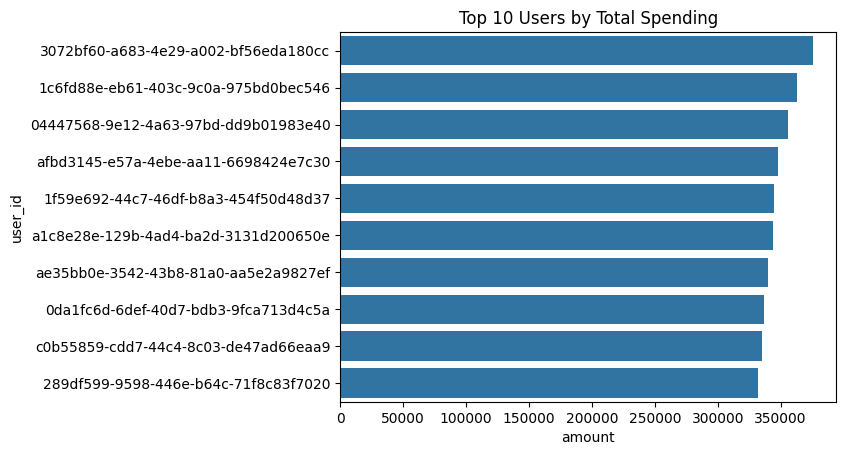

In [28]:
sns.barplot(data=total_spending.head(10), y='user_id', x='amount');
plt.title("Top 10 Users by Total Spending");

In [12]:
transaction_per_user = clean_df.groupby(['user_id'])['transaction_id'].count().reset_index()\
                        .sort_values(by='transaction_id', ascending=False)
transaction_per_user

,user_id,transaction_id
99,ffea3378-776f-4e46-b82d-d3ff97f33a38,69
2,04447568-9e12-4a63-97bd-dd9b01983e40,68
71,ae35bb0e-3542-43b8-81a0-aa5e2a9827ef,68
12,1f59e692-44c7-46df-b8a3-454f50d48d37,66
11,1c6fd88e-eb61-403c-9c0a-975bd0bec546,66
...,...,...
56,8f8be672-adc4-463e-87dc-e24d9469effc,43
33,44d7a811-b6d5-4baf-9529-e24d1a35712e,42
23,35143260-7257-4d1c-97f5-025d7df76a60,42
60,9c5c6f97-bff4-4ef1-be64-c99872cf1c25,41


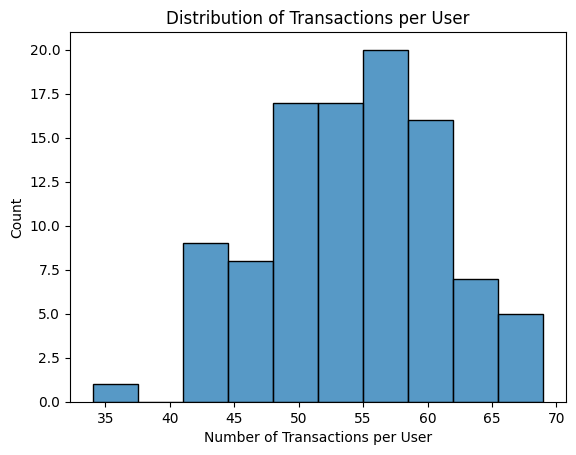

In [33]:
sns.histplot(data=transaction_per_user, x='transaction_id', bins=10);
plt.xlabel("Number of Transactions per User");
plt.title("Distribution of Transactions per User");

> Above is the number of transactions per unique users in the dataset sorted in descending order of the number of transactions, within the time frame the data was collected the maximum number of transaction is *69* while the minimum is *34*. 

> The plot provides additional information - majority of the users made about 56 transactions.

In [13]:
clean_df['transaction_month'] = clean_df['transaction_date'].dt.month
clean_df['due_month'] = clean_df['due_date'].dt.month

In [14]:
print(clean_df['transaction_month'].unique())
print(clean_df['due_month'].unique())

[10 11 12  1  2  3]
[10 11 12  1  2  3]


In [15]:
# Replace numbers with the month's short name

clean_df['transaction_month'].replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}, inplace=True);

clean_df['due_month'].replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}, inplace=True);

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_19492\1741352922.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['transaction_month'].replace({
C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_19492\1741352922.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [16]:
transaction_per_month = clean_df.groupby(['user_id', 'transaction_month'])['transaction_id']\
                            .count().reset_index()
transaction_per_month

,user_id,transaction_month,transaction_id
0,0062ca1b-7573-4160-85ef-838133c0427c,Dec,5
1,0062ca1b-7573-4160-85ef-838133c0427c,Feb,6
2,0062ca1b-7573-4160-85ef-838133c0427c,Jan,11
3,0062ca1b-7573-4160-85ef-838133c0427c,Mar,10
4,0062ca1b-7573-4160-85ef-838133c0427c,Nov,6
...,...,...,...
595,ffea3378-776f-4e46-b82d-d3ff97f33a38,Feb,12
596,ffea3378-776f-4e46-b82d-d3ff97f33a38,Jan,7
597,ffea3378-776f-4e46-b82d-d3ff97f33a38,Mar,11
598,ffea3378-776f-4e46-b82d-d3ff97f33a38,Nov,13


In [17]:
transaction_per_month = transaction_per_month.pivot(index='user_id', 
                                                    columns='transaction_month', 
                                                    values='transaction_id')

transaction_per_month

transaction_month,Dec,Feb,Jan,Mar,Nov,Oct
user_id,,,,,,
0062ca1b-7573-4160-85ef-838133c0427c,5,6,11,10,6,9
0414e594-221d-4329-be87-3fd99f0d9063,5,10,11,8,7,14
04447568-9e12-4a63-97bd-dd9b01983e40,10,14,12,10,9,13
050a1bae-93da-4cc8-92e8-9fb17756125d,7,6,11,7,12,5
053d332e-0a01-4d5e-900a-ec02f85ffec2,6,11,13,10,6,13
...,...,...,...,...,...,...
ec163be2-2504-43fa-8d7a-027d6f614089,9,14,14,3,10,7
ee3497aa-35d4-4de5-9ceb-f3946d031746,14,12,10,9,10,5
f88b8c6f-2a02-4502-b953-34b4699a1770,9,11,8,14,12,9


> In other to calculate the number of transaction per month for each user, the month feature was first extracted from the *transaction_date*, the number representation of the month was converted to the month's short form, the data was grouped by the *user_id* and the *transaction_month*, the number of transactions was then counted and the data was converted to wide format.

In [39]:
cum_month = transaction_per_month.sum().sort_values(ascending=False).reset_index(name='month_total')
cum_month

,transaction_month,month_total
0,Jan,918
1,Nov,911
2,Mar,910
3,Feb,894
4,Oct,894
5,Dec,871


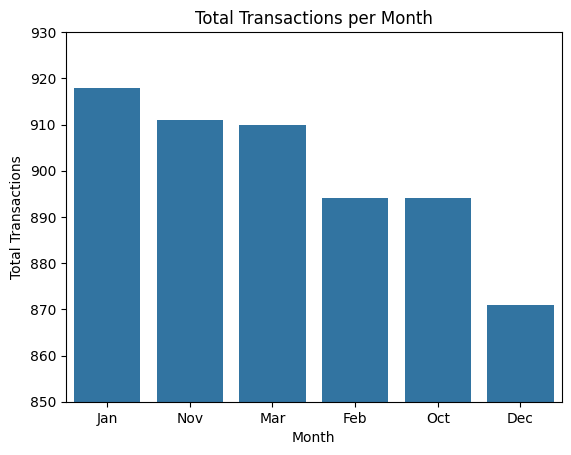

In [45]:
sns.barplot(data=cum_month, x='transaction_month', y='month_total');
plt.title("Total Transactions per Month");
plt.xlabel("Month");
plt.ylabel("Total Transactions");
plt.ylim(850, 930);

> The result above shows the number of transactions that occured per month arranged in descending order. The output reveals January is the month with the most transaction made which is quite intuitive.

> I altered the y-axis of the plot to make difference between the values evident.

In [19]:
amount_per_month = clean_df.groupby(['user_id', 'transaction_month'])['amount'].mean().round(2)

amount_per_month = amount_per_month.reset_index().pivot(index='user_id', columns='transaction_month',
                                values='amount')
amount_per_month

transaction_month,Dec,Feb,Jan,Mar,Nov,Oct
user_id,,,,,,
0062ca1b-7573-4160-85ef-838133c0427c,6704.84,4500.36,3940.64,3956.66,5334.74,5909.34
0414e594-221d-4329-be87-3fd99f0d9063,3614.01,5522.98,5013.91,4204.71,6886.57,5247.14
04447568-9e12-4a63-97bd-dd9b01983e40,5683.71,5003.68,4865.56,5488.37,5584.28,5047.77
050a1bae-93da-4cc8-92e8-9fb17756125d,3458.22,7006.30,4903.32,5991.04,6549.99,6426.48
053d332e-0a01-4d5e-900a-ec02f85ffec2,5300.38,5489.55,6511.64,4660.75,3709.85,5367.44
...,...,...,...,...,...,...
ec163be2-2504-43fa-8d7a-027d6f614089,7356.61,5472.62,5726.67,3332.87,4068.24,4530.34
ee3497aa-35d4-4de5-9ceb-f3946d031746,5675.28,4476.62,6013.17,4577.58,5896.44,4772.63
f88b8c6f-2a02-4502-b953-34b4699a1770,5536.91,5010.17,4104.03,3902.23,5345.16,5042.19


In [20]:
amount_per_month.sum().sort_values(ascending=False)

transaction_month
Nov    527050.16
Oct    518040.39
Jan    518010.23
Dec    516208.58
Mar    510131.15
Feb    505624.48
dtype: float64

> While the previous output showed that January was the month with most transactions, the above result shows more transactions doesn't translate to more spending. The month with the most spending is **November**.

In [21]:
category_spending = clean_df.groupby(['user_id', 'category'])['amount'].sum()\
                        .reset_index().pivot(index='user_id', columns='category', values='amount')

category_spending

category,other,petrol,rent,solar,subscription,utility
user_id,,,,,,
0062ca1b-7573-4160-85ef-838133c0427c,12499.22,92853.22,43581.34,27478.10,17900.19,34320.55
0414e594-221d-4329-be87-3fd99f0d9063,17106.63,70839.47,40035.97,43588.92,65146.67,47038.74
04447568-9e12-4a63-97bd-dd9b01983e40,32086.33,103965.47,70924.86,53883.30,27548.94,67629.71
050a1bae-93da-4cc8-92e8-9fb17756125d,62272.75,66017.46,82307.88,20134.22,25265.70,16853.39
053d332e-0a01-4d5e-900a-ec02f85ffec2,24317.94,109864.35,48364.78,47185.07,34684.24,51065.62
...,...,...,...,...,...,...
ec163be2-2504-43fa-8d7a-027d6f614089,27918.04,71494.75,36425.84,58829.19,25999.77,84725.37
ee3497aa-35d4-4de5-9ceb-f3946d031746,30958.14,110537.55,46638.34,13669.45,49413.16,66114.19
f88b8c6f-2a02-4502-b953-34b4699a1770,54099.33,77003.35,24039.91,32908.06,49599.91,64278.64


In [22]:
category_spending.sum().sort_values(ascending=False)

category
petrol          8419891.36
utility         5419346.60
solar           4165163.37
rent            4152607.05
other           2933575.76
subscription    2769083.26
dtype: float64

> Output shows that *petrol* is the leading category among the users.

In [50]:
clean_df['credit_util'] = (clean_df['balance'] / clean_df['credit_limit']).round(3)

clean_df.head()

,user_id,transaction_id,amount,transaction_date,due_date,category,balance,credit_limit,transaction_month,due_month,credit_util
0,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,6b70ecb7-5c0b-4b8c-8693-80e59d708770,2873.95,2024-10-16,2024-10-16,petrol,93440.05,150000,Oct,Oct,0.623
1,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,c6b4d6c1-5412-4606-b701-fec6cc877909,7388.38,2024-10-19,2024-10-19,solar,88925.62,150000,Oct,Oct,0.593
2,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,8cc164b3-c51c-4671-a40e-aec2cd93bf49,7645.70,2024-10-09,2024-10-09,petrol,88668.30,150000,Oct,Oct,0.591
3,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,9a9ada38-58cf-43be-82d2-27449a7dc9a4,6699.36,2024-10-30,2024-10-30,petrol,96314.00,150000,Oct,Oct,0.642
4,a8d341b8-b2ab-42ce-91b3-a9b4b296d411,daf2de00-0447-4a32-8d80-36a3ce43ef51,787.40,2024-10-24,2024-10-24,subscription,96314.00,150000,Oct,Oct,0.642


> The credit utilization score was calculated using the *balance* divided by the *credit_limit*; it is a key indicator of how much credit a user is using relative to how much is available. Values closer to 1 suggests the user is dependent on credit while values closer to 0 indicates a responsible use of credit.

In [51]:
clean_df['credit_util'].describe()

count    5398.000000
mean        0.494203
std         0.269402
min         0.001000
25%         0.281000
50%         0.476000
75%         0.714000
max         0.996000
Name: credit_util, dtype: float64

> Running the describe method on the *credit_util* feature shows that 25% of users are heavily dependent on credit using at least 71.4% of the credit, this signals high risk of not repaying the loan

In [63]:
def utilization_category(x):
    if x < 0.3:
        return 'Low'
    elif x <= 0.7:
        return 'Medium'
    else:
        return 'High'
    
clean_df['util_level'] = clean_df['credit_util'].apply(utilization_category)

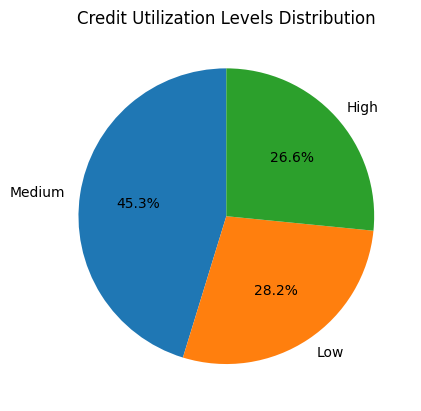

In [67]:
plt.pie(clean_df['util_level'].value_counts(),
        labels=clean_df['util_level'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90);
plt.title("Credit Utilization Levels Distribution");

## Day 3: Scoring Logic

1. Implement a basic credit scoring logic based on:
   - Payment history (on-time vs late)
   - Credit utilization
   - Transaction consistency
   - Category-level insights (e.g., solar usage)
2. Normalize scores to a scale of 300–850.
3. (Optional) Visualize score distribution or top scorers.

In [ ]:
# Your scoring logic here